In [1]:
import pandas as pd
df = pd.read_csv("heart.csv")  


## Train a Decision Tree

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=42)

## Visualize the dicision Tree

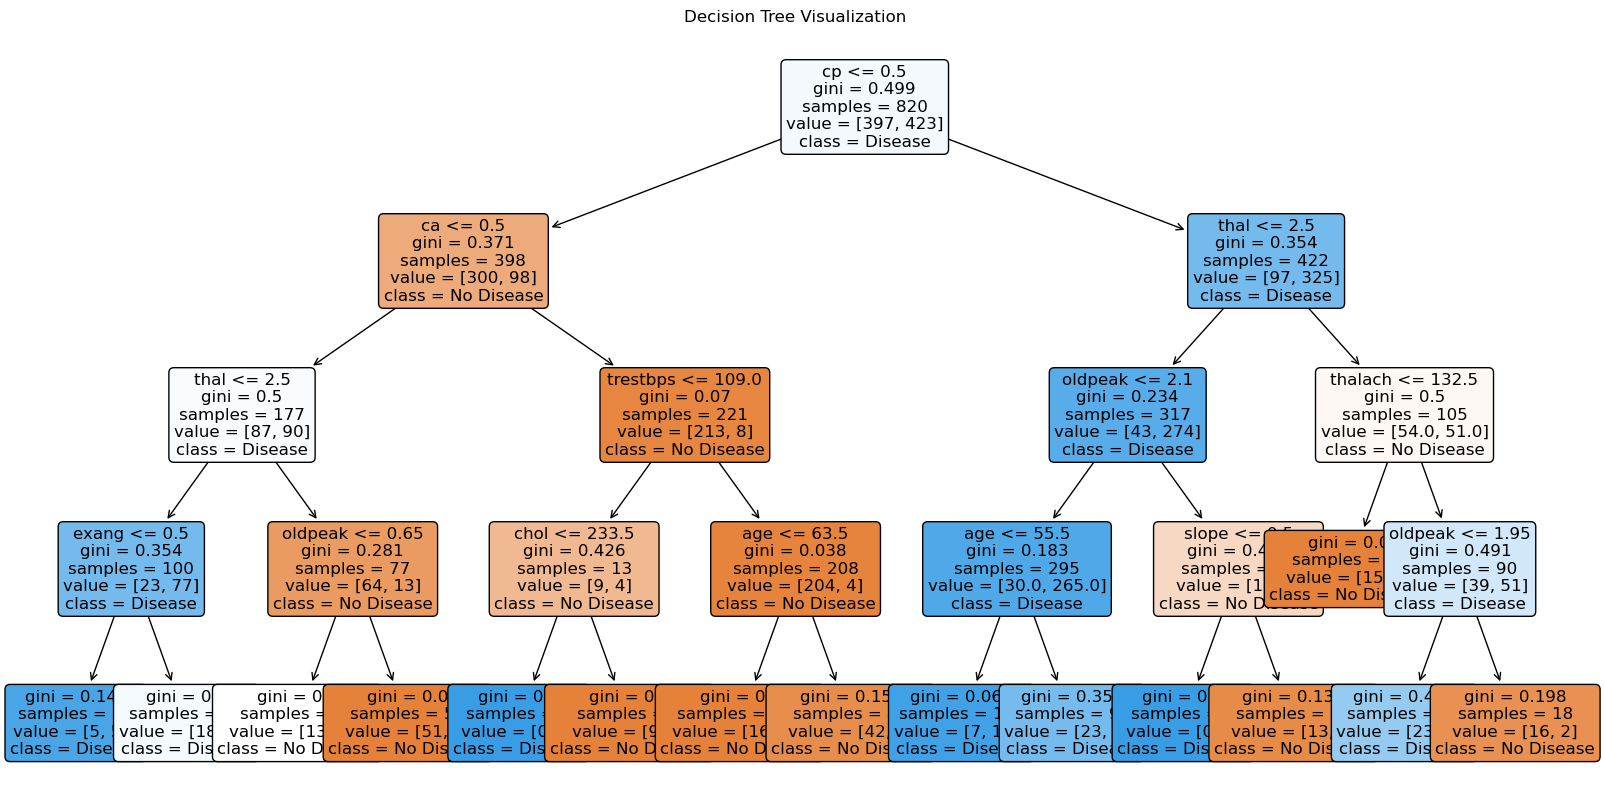

In [13]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(clf, 
          feature_names=X.columns, 
          class_names=['No Disease', 'Disease'], 
          filled=True, 
          rounded=True, 
          fontsize=12)
plt.title("Decision Tree Visualization")
plt.show()


## Analyse Overfitting

In [16]:
from sklearn.metrics import accuracy_score

train_acc = accuracy_score(y_train, clf.predict(X_train))
test_acc = accuracy_score(y_test, clf.predict(X_test))
print(f"Train Accuracy: {train_acc:.2f}, Test Accuracy: {test_acc:.2f}")


Train Accuracy: 0.88, Test Accuracy: 0.80


## Train a Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

rf_acc = accuracy_score(y_test, rf.predict(X_test))
print(f"Random Forest Accuracy: {rf_acc:.2f}")


Random Forest Accuracy: 0.99


## Feature Importance 

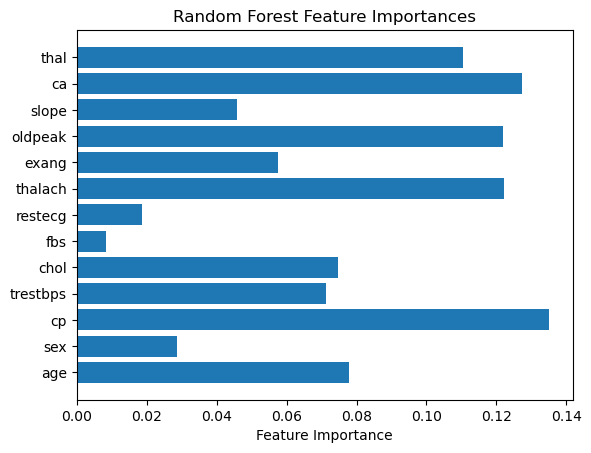

In [22]:
import matplotlib.pyplot as plt

importances = rf.feature_importances_
features = X.columns

plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importances")
plt.show()


## Evaluate Using Cross Validation 

In [24]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf, X, y, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Average CV Score: {cv_scores.mean():.2f}")


Cross-validation scores: [1.         1.         1.         1.         0.98536585]
Average CV Score: 1.00
